<a href="https://colab.research.google.com/github/Ayushi-1903/DATA-PIPELINE-DEVELOPMENT/blob/main/Task_1_Data_Pipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pipline Devploment:

# Name: Ayushi Verma

Imports:
Import essential libraries for data handling (pandas), visualization (seaborn, matplotlib), preprocessing, modeling, and diagramming (sklearn, graphviz, networkx).

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import graphviz
from IPython.display import Image, display
import os


extract_data():
Reads a CSV file into a pandas DataFrame and prints a success message.

In [ ]:
def extract_data(csv_path):
    print("🔹 Step 1: Extracting data from CSV...")
    df = pd.read_csv('/content/adult.csv')
    print("✅ Raw data loaded successfully.\n")
    return df

visualize_data():
Saves visualizations like target distribution and correlation heatmap to the output directory.

In [ ]:
def visualize_data(df, target_col, output_dir="output"):
    print("🔹 Step 2: Performing data visualization...")
    os.makedirs(output_dir, exist_ok=True)

    if target_col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=target_col, data=df)
        plt.title('Target Column Distribution')
        plt.savefig(f'{output_dir}/target_distribution.png')
        plt.close()

    plt.figure(figsize=(10, 8))
    sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.savefig(f'{output_dir}/correlation_heatmap.png')
    plt.close()
    print("📊 Visualizations saved.\n")

Inline EDA:
Displays target distribution and heatmap using matplotlib inline (outside the function for quick analysis).



🔹 Step 1: Extracting data from CSV...
✅ Raw data loaded successfully.



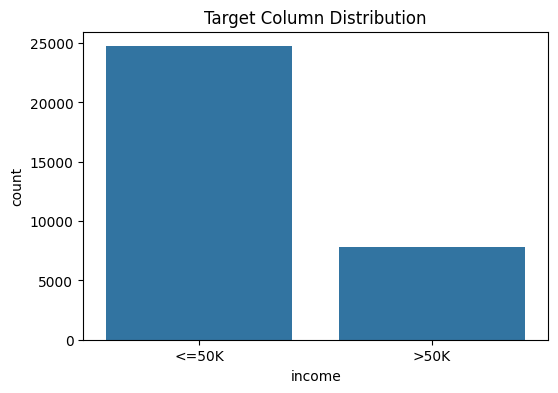

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = extract_data('/content/adult.csv')
if 'income' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='income', data=df)
    plt.title('Target Column Distribution')
    plt.show()
    plt.close()

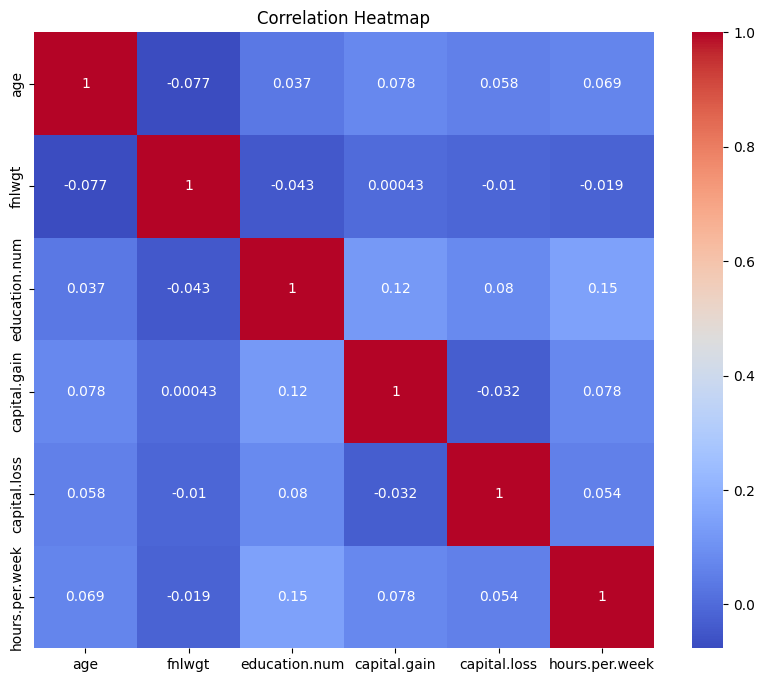

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.close()

🔍 Generating pairplot...


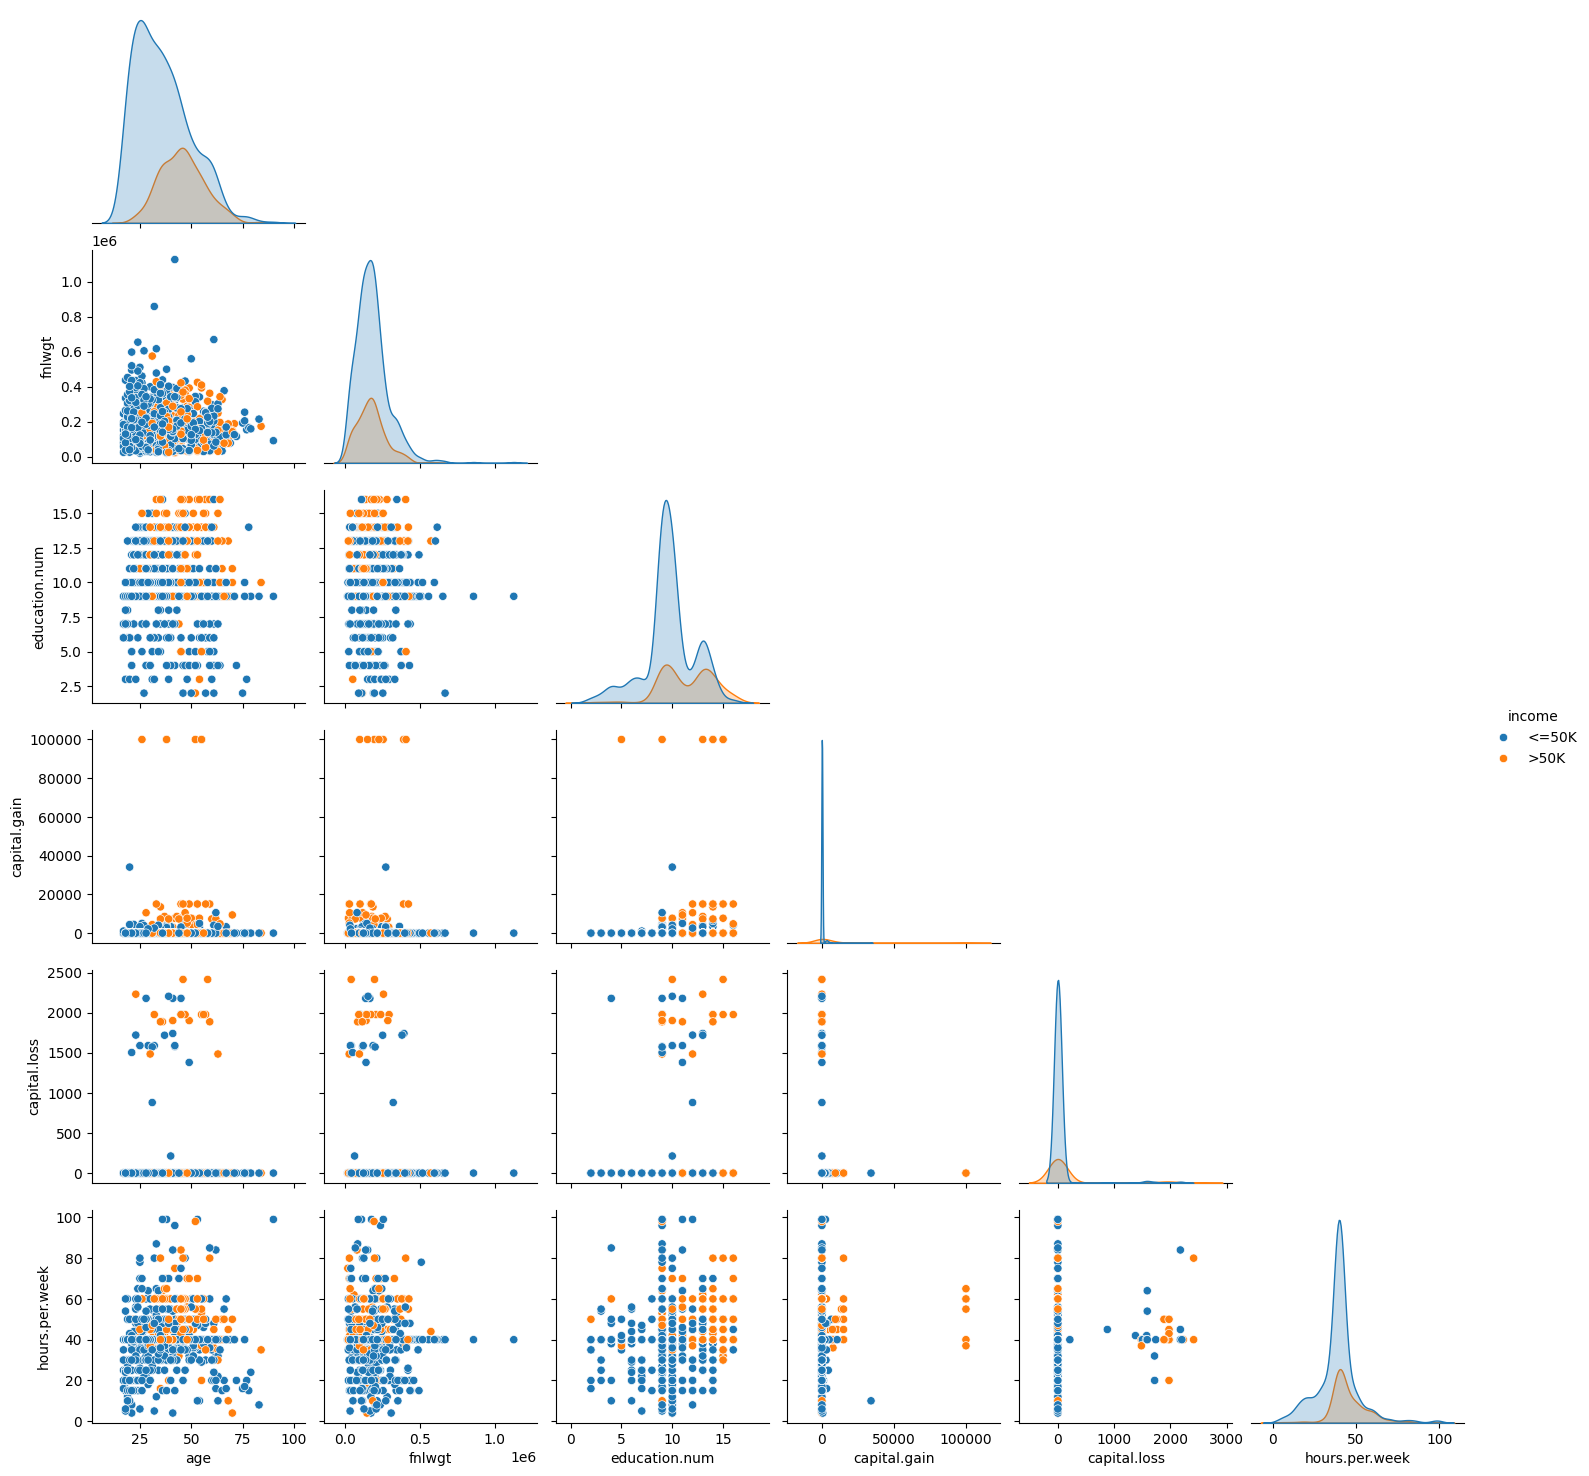

In [ ]:
def plot_pairplot(df, target_col, output_dir="output"):
    print("🔍 Generating pairplot...")
    sample_df = df.sample(n=1000, random_state=42)
    sns.pairplot(sample_df, hue=target_col, corner=True)
    plt.savefig(f"{output_dir}/pairplot.png")
    plt.show()
    #plt.close()


plot_pairplot(df, 'income')


🧩 Pie chart for class distribution...


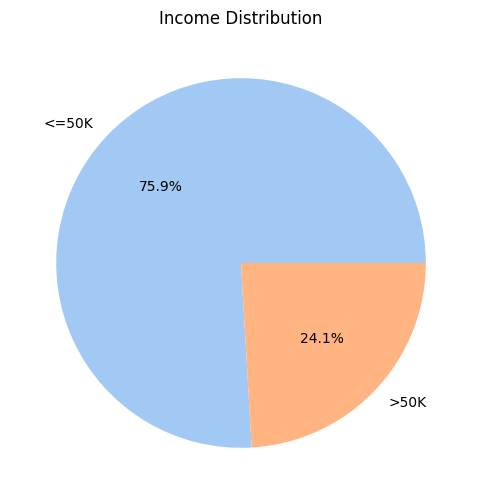

In [ ]:
def plot_class_pie(df, target_col, output_dir="output"):
    print("🧩 Pie chart for class distribution...")
    plt.figure(figsize=(6, 6))
    df[target_col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.ylabel('')
    plt.title('Income Distribution')
    plt.savefig(f"{output_dir}/class_pie_chart.png")
    plt.show()
    # plt.close()

plot_class_pie(df, 'income')

transform_data():
Preprocesses the data using pipelines—imputes, encodes, scales, splits it into train/test sets, and returns transformed datasets.

In [ ]:
def transform_data(df, target_col):
    print("🔹 Step 3: Transforming the data (cleaning, encoding, scaling)...")

    X = df.drop(target_col, axis=1)
    y = df[target_col]

    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

    print(f"Numerical columns: {numerical_cols}")
    print(f"Categorical columns: {categorical_cols}")

    # Pipelines
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('numerical', numerical_pipeline, numerical_cols),
        ('categorical', categorical_pipeline, categorical_cols)
    ])

    print("Splitting dataset into training and testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Applying preprocessing pipeline...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    feature_names = preprocessor.get_feature_names_out()

    X_train_df = pd.DataFrame(X_train_processed.toarray(), columns=feature_names)
    X_test_df = pd.DataFrame(X_test_processed.toarray(), columns=feature_names)

    print("✅ Transformation complete.\n")
    return X_train_df, X_test_df, y_train, y_test, preprocessor


load_data():
Saves the preprocessed training and test data (features and targets) into CSV files.

In [ ]:
def load_data(X_train_df, X_test_df, y_train, y_test, output_dir="output"):
    print("🔹 Step 4: Loading (saving) processed data to disk...")
    os.makedirs(output_dir, exist_ok=True)
    X_train_df.to_csv(f'{output_dir}/train_processed.csv', index=False)
    X_test_df.to_csv(f'{output_dir}/test_processed.csv', index=False)
    y_train.to_csv(f'{output_dir}/y_train.csv', index=False)
    y_test.to_csv(f'{output_dir}/y_test.csv', index=False)
    print("✅ Processed data saved to CSVs.\n")


create_etl_diagram():
Creates and saves a flowchart diagram of the ETL pipeline using Graphviz.

In [ ]:
def create_etl_diagram(output_dir="output"):
    print("🔹 Step 5: Generating ETL data flow diagram...")
    dot = graphviz.Digraph(comment='ETL Data Flow')
    dot.node('A', 'Raw CSV')
    dot.node('B', 'EDA + Visualization')
    dot.node('C', 'Data Splitting\n(Train/Test)')
    dot.node('D', 'Numerical Pipeline\n(Impute + Scale)')
    dot.node('E', 'Categorical Pipeline\n(Impute + Encode)')
    dot.node('F', 'ColumnTransformer')
    dot.node('G', 'Transformed Data')
    dot.node('H', 'Save to CSV')

    dot.edges(['AB', 'BC', 'CD', 'CE', 'DF', 'EF'])
    dot.edge('F', 'G')
    dot.edge('G', 'H')

    os.makedirs(output_dir, exist_ok=True)
    dot.render(f'{output_dir}/data_flow_diagram', format='png', cleanup=True)
    print("📈 ETL diagram generated.")

    # Show inline
    display(Image(filename=f'{output_dir}/data_flow_diagram.png'))

In [ ]:
def main():
    print("\n🔁 Starting ETL Pipeline Process 🔁\n")
    csv_path = '/content/adult.csv'
    target_column = 'income'

    df = extract_data(csv_path)
    visualize_data(df, target_column)
    X_train_df, X_test_df, y_train, y_test, _ = transform_data(df, target_column)
    load_data(X_train_df, X_test_df, y_train, y_test)
    create_etl_diagram()
    print("🎉 ETL Pipeline completed successfully!")

draw_etl_flow_with_matplotlib():
Draws a simplified ETL flow using NetworkX and saves it as an image.

In [ ]:
import networkx as nx

def draw_etl_flow_with_matplotlib():
    print("📌 Drawing Extract & Transform Flow with matplotlib...")

    G = nx.DiGraph()

    # Nodes
    G.add_node("Raw CSV", pos=(0, 2))
    G.add_node("Extracted DataFrame", pos=(2, 2))
    G.add_node("Preprocessing\n(Transform)", pos=(4, 2))
    G.add_node("Cleaned + Transformed Data", pos=(6, 2))

    # Edges
    G.add_edge("Raw CSV", "Extracted DataFrame")
    G.add_edge("Extracted DataFrame", "Preprocessing\n(Transform)")
    G.add_edge("Preprocessing\n(Transform)", "Cleaned + Transformed Data")

    # Get positions and draw
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 3))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="#a6cee3", font_size=10, font_weight="bold", arrowsize=20)
    plt.title("ETL Data Flow: Extract & Transform")
    plt.tight_layout()
    plt.savefig("output/extract_transform_flow.png")
    plt.show()
    print("✅ Extract-Transform flow diagram saved and displayed.\n")

In [ ]:
def main():
    print("\n🔁 Starting ETL Pipeline Process 🔁\n")
    csv_path = '/content/adult.csv'
    target_column = 'income'

    df = extract_data(csv_path)
    visualize_data(df, target_column)

    global X_train_df, X_test_df, y_train, y_test, preprocessor
    X_train_df, X_test_df, y_train, y_test, preprocessor = transform_data(df, target_column)
    load_data(X_train_df, X_test_df, y_train, y_test)
    create_etl_diagram()
    draw_etl_flow_with_matplotlib()
    print("🎉 ETL Pipeline completed successfully!")


RandomForestClassifier model training:
Trains a Random Forest classifier on the transformed training data and evaluates it using classification_report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


main():
Runs the entire ETL pipeline: extract, visualize, transform, save, and draw diagrams.


🔁 Starting ETL Pipeline Process 🔁

🔹 Step 1: Extracting data from CSV...
✅ Raw data loaded successfully.

🔹 Step 2: Performing data visualization...
📊 Visualizations saved.

🔹 Step 3: Transforming the data (cleaning, encoding, scaling)...
Numerical columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Splitting dataset into training and testing sets...
Applying preprocessing pipeline...
✅ Transformation complete.

🔹 Step 4: Loading (saving) processed data to disk...
✅ Processed data saved to CSVs.

🔹 Step 5: Generating ETL data flow diagram...
📈 ETL diagram generated.


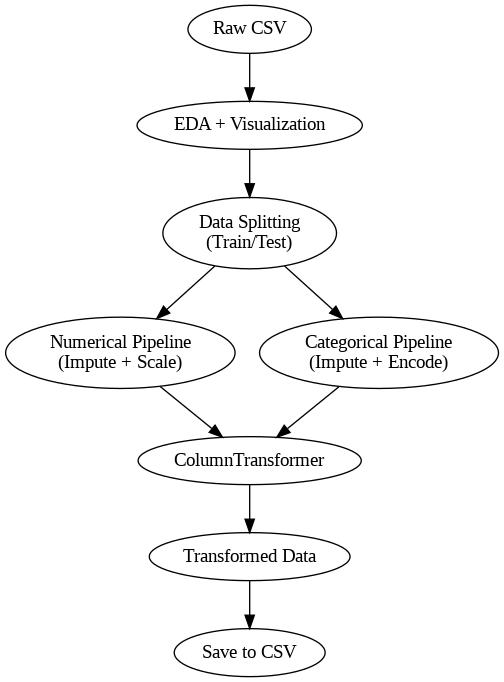

📌 Drawing Extract & Transform Flow with matplotlib...


<ipython-input-22-7ee151a7292c>:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


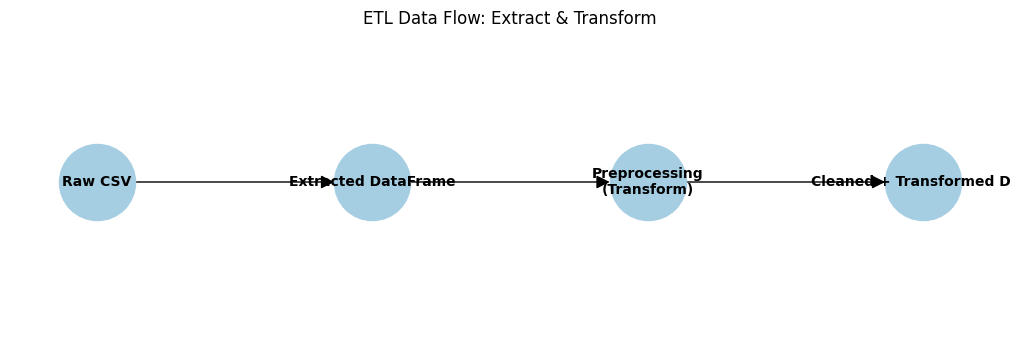

✅ Extract-Transform flow diagram saved and displayed.

🎉 ETL Pipeline completed successfully!
🔹 Step 3: Transforming the data (cleaning, encoding, scaling)...
Numerical columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Splitting dataset into training and testing sets...
Applying preprocessing pipeline...
✅ Transformation complete.



RandomForestClassifier(random_state=42)

In [ ]:
main()


clf = RandomForestClassifier(n_estimators=100, random_state=42)
X_train_df, X_test_df, y_train, y_test, _ = transform_data(df, 'income')
clf.fit(X_train_df, y_train)

In [ ]:
y_pred = clf.predict(X_test_df)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4976
        >50K       0.71      0.61      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [ ]:
importances = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

In [ ]:
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False).head(15)

Feature importance visualization:
Plots a bar chart of the top 15 most important features from the trained Random Forest model.

<ipython-input-29-9a9f2b223b2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')


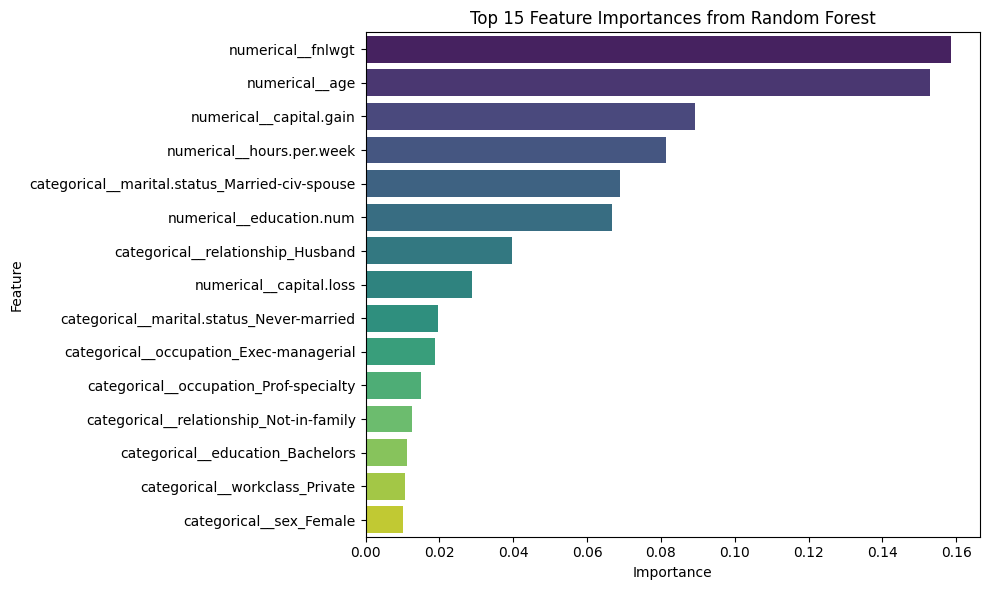

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

This function prints a summary of each transformer in the preprocessing pipeline, including its name, the columns it processes, and the steps it performs.
The call to print_pipeline_structure(preprocessor) outputs this structure to the console.

In [ ]:
def print_pipeline_structure(preprocessor):
    print("\n📋 Pipeline Structure Summary:")
    for name, transformer, columns in preprocessor.transformers:
        print(f"\n➡️ Transformer: {name}")
        print(f"   Columns: {columns}")
        print(f"   Steps: {[step[0] for step in transformer.steps]}")

print_pipeline_structure(preprocessor)



📋 Pipeline Structure Summary:

➡️ Transformer: numerical
   Columns: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
   Steps: ['imputer', 'scaler']

➡️ Transformer: categorical
   Columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
   Steps: ['imputer', 'onehot']


This code performs and visualizes a 2D Principal Component Analysis (PCA) on the training dataset to show how the data clusters based on the target labels.

📐 Generating PCA 2D visualization...


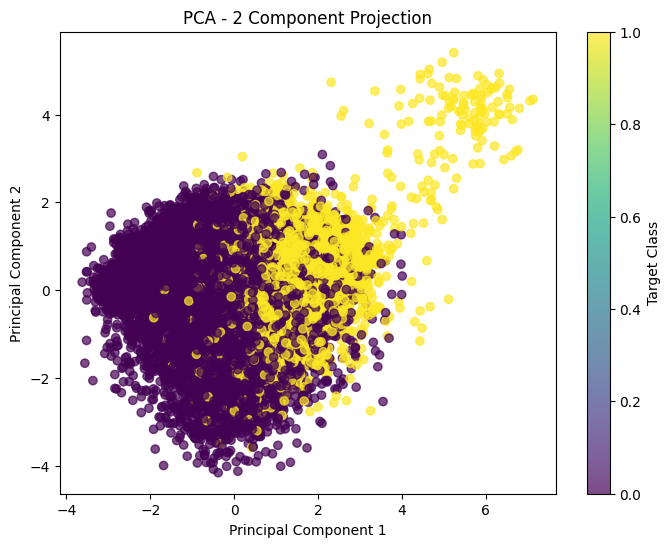

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(X_train_df, y_train, output_dir="output"):
    print("📐 Generating PCA 2D visualization...")
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_train_df)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(components[:, 0], components[:, 1], c=pd.factorize(y_train)[0], cmap='viridis', alpha=0.7)
    plt.title('PCA - 2 Component Projection')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Target Class')
    plt.savefig(f"{output_dir}/pca_projection.png")
    plt.show()
    # plt.close()

plot_pca(X_train_df, y_train)